# Example notebook for connectome model building

This is an example notebook demonstrating model building on a toy data set, which
 - loads connectome data
 - creates a data-based model
 - visualizes data vs. model


## How to build model

In [1]:
# Global imports
import numpy as np
import pandas as pd
import scipy.sparse as sps

# Local imports
from connalysis.modelling import modelling

In [2]:
# Load example data (adjacency matrix & neuron properties table)
adj_file = './adj_r0c10.npz'
nrn_file = './nodes_r0c10.h5'
adj_matrix = sps.load_npz(adj_file)
nrn_table = pd.read_hdf(nrn_file)
assert adj_matrix.shape[0] == adj_matrix.shape[1] == nrn_table.shape[0], 'ERROR: Data size mismatch!'
print(f'INFO: Loaded connectivity and properties of {nrn_table.shape[0]} neurons')

INFO: Loaded connectivity and properties of 6719 neurons


### Example how to build 2nd-order model

In [3]:
# Configure model building
config_dict = {'model_name': 'ConnProb2ndOrder',  # Name of the model (to be used in file names, ...)
               'model_order': 2,                  # Model order
               'bin_size_um': 100,                # Bin size (um) for depth binning
               'max_range_um': 1000,              # Max. distance (um) range to consider (None to use full distance range)
               'sample_size': 1000,               # Size of random subset of neurons to consider (0 or None to disable subsampling)
               'sample_seed': 4321,               # Seed for selecting random subset of neurons
               'model_dir': './modelling/models', # Output directory where to save the model (None to disable saving)
               'data_dir': './modelling/data',    # Output directory where to save the extracted data (None to disable saving)
               'do_plot': True,                   # Enable/disable output plotting
               'plot_dir': './modelling/figs',    # Output directory where to save the plots (None to disable saving)
               'N_split': None,                   # Number of data splits to sequentially run computations on, reducing memory consumption (None to disable splitting)
               'part_idx': None}                  # Part index to run data extraction only of given part idx (None to disable; -1 to merge existing parts)

[2023-02-06 12:18:30,895] INFO: Running order-2 model building {'bin_size_um': 100, 'max_range_um': 1000, 'sample_size': 1000, 'sample_seed': 4321, 'model_dir': './modelling/models', 'data_dir': './modelling/data', 'do_plot': True, 'plot_dir': './modelling/figs', 'N_split': None, 'part_idx': None}...
[2023-02-06 12:18:30,897] INFO: Subsampling to 1000 of 6719 neurons (seed=4321)
[2023-02-06 12:18:30,911] INFO: Extracting 1-dimensional (10) connection probabilities...


[2023-02-06 12:18:30,994] INFO: Pickled dict written to ./modelling/data/ConnProb2ndOrder__data.pickle
[2023-02-06 12:18:30,997] INFO: MODEL FIT: f(x) = 0.084910 * exp(-0.004613 * x)
[2023-02-06 12:18:30,998] INFO: Pickled dict written to ./modelling/models/ConnProb2ndOrder__model.pickle


[2023-02-06 12:18:31,901] INFO: Figure saved to /gpfs/bbp.cscs.ch/home/pokorny/git/connectome_analysis/tutorials/modelling/figs/ConnProb2ndOrder__data_vs_model.png
[2023-02-06 12:18:32,442] INFO: Figure saved to /gpfs/bbp.cscs.ch/home/pokorny/git/connectome_analysis/tutorials/modelling/figs/ConnProb2ndOrder__data_counts.png


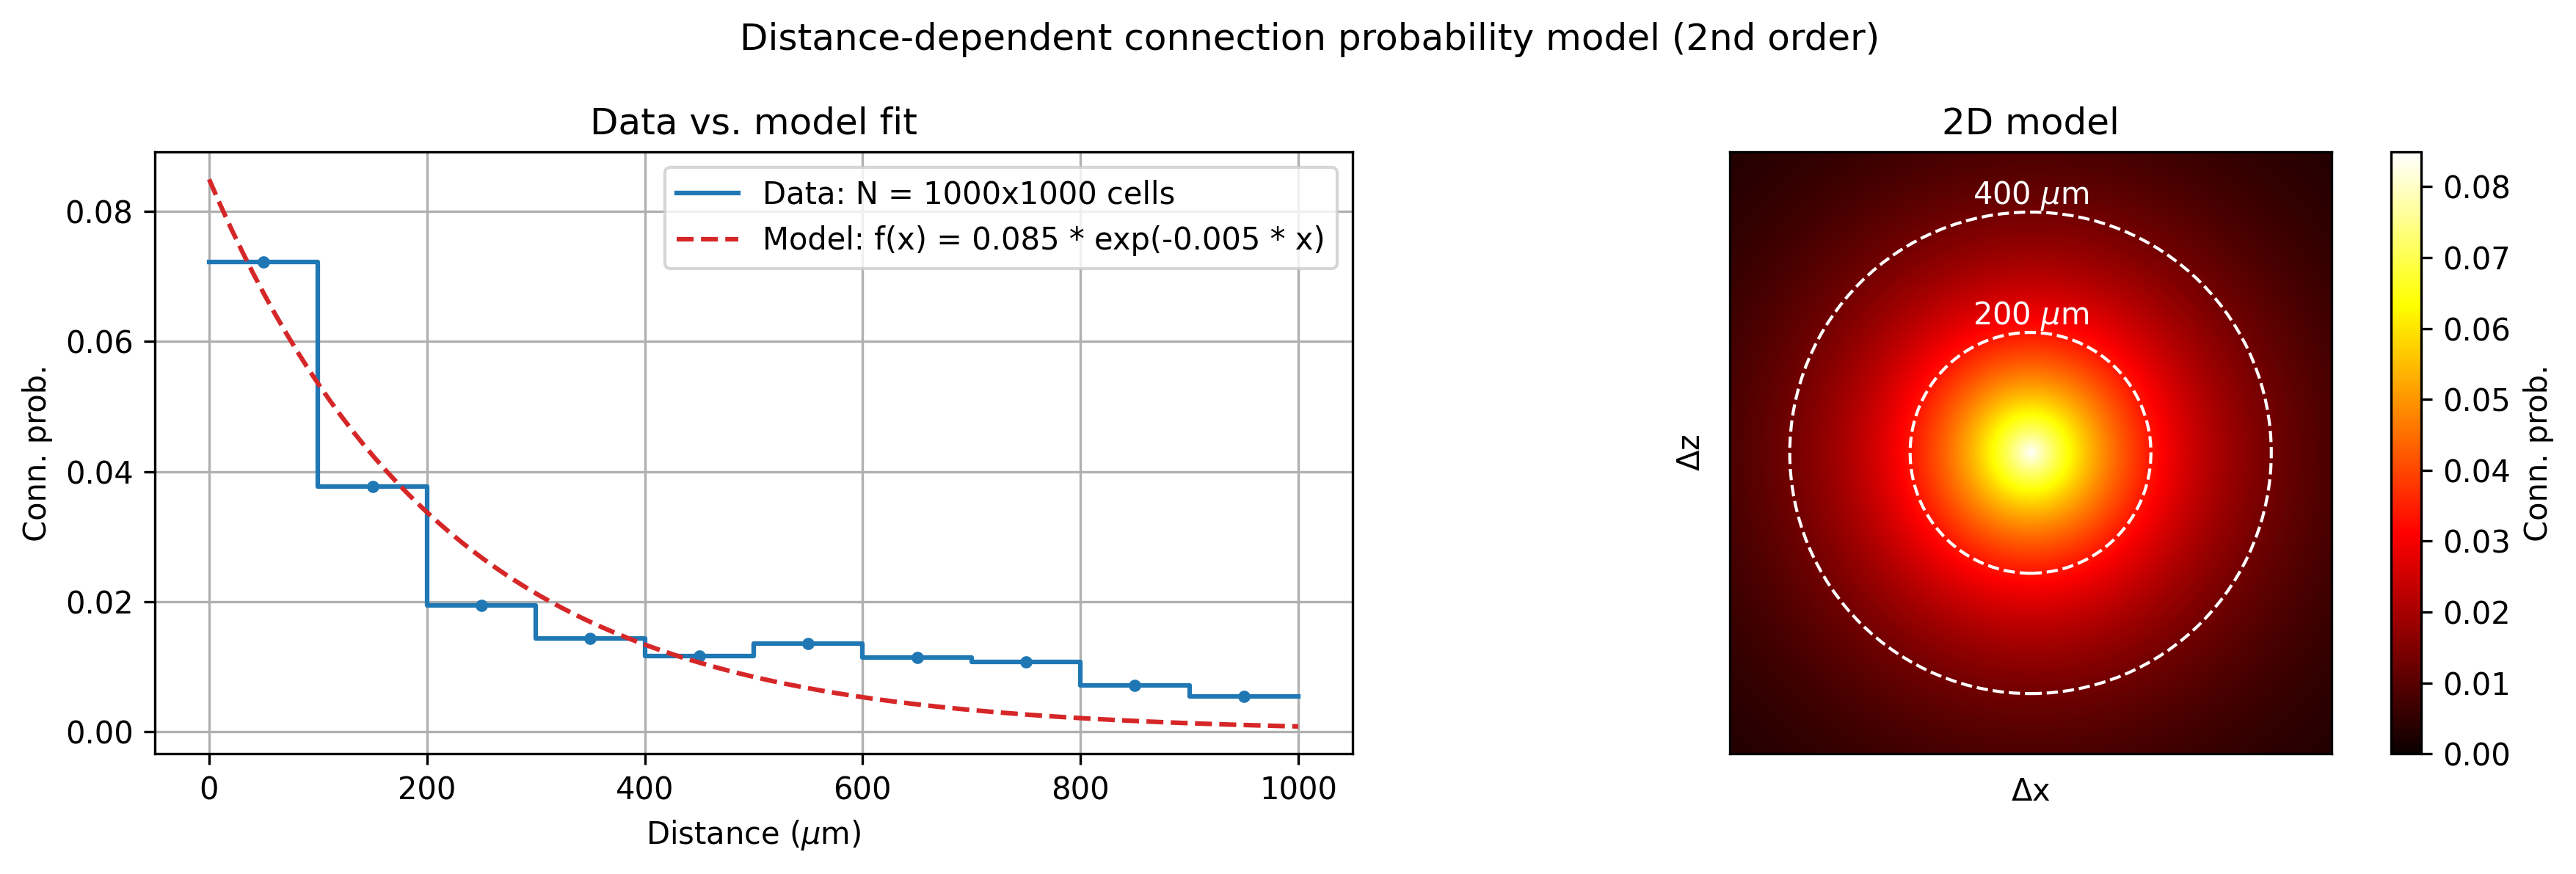

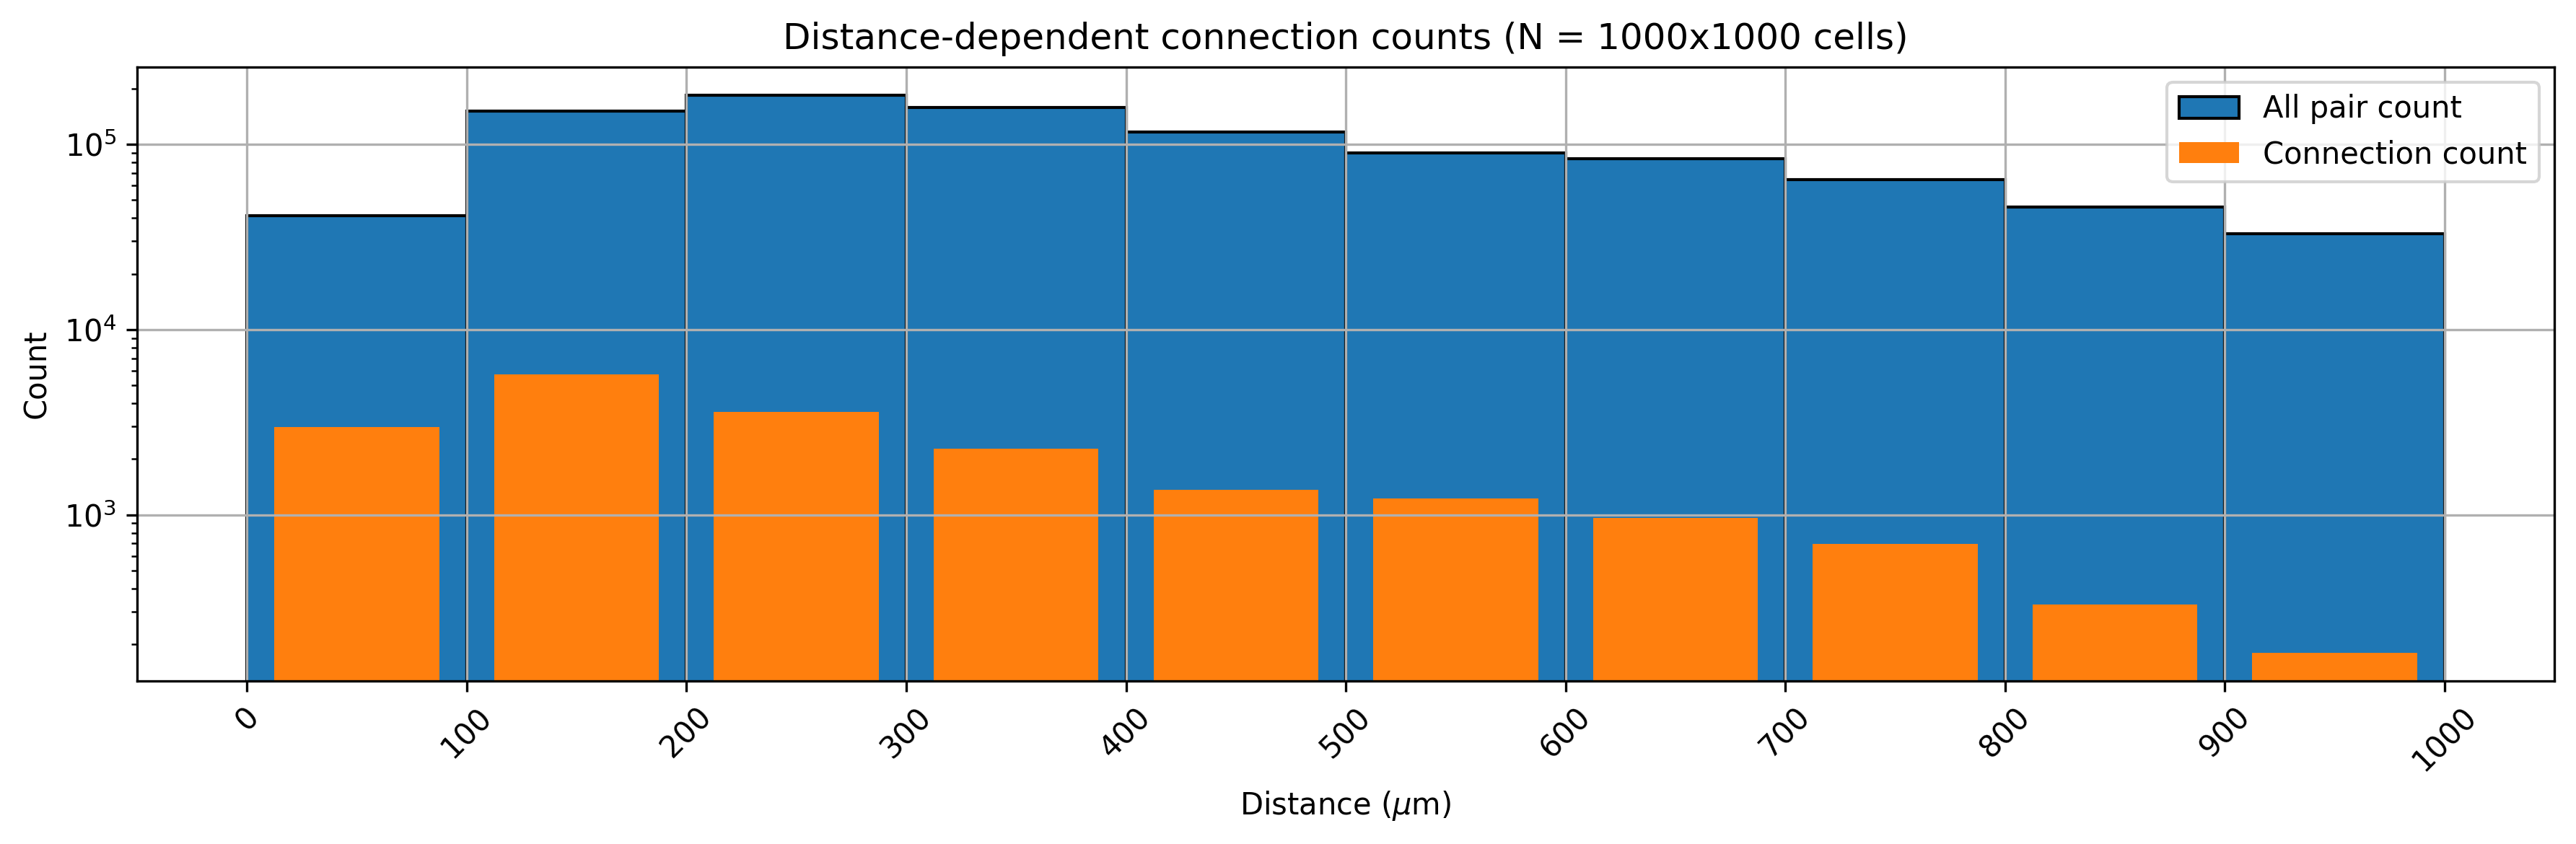

In [4]:
# Run model building
data_dict, model_dict = modelling.run_model_building(adj_matrix, nrn_table, **config_dict)

### Example how to build 3rd-order model

In [5]:
# Configure model building
config_dict = {'model_name': 'ConnProb3rdOrder',  # Name of the model (to be used in file names, ...)
               'model_order': 3,                  # Model order
               'bin_size_um': 100,                # Bin size (um) for depth binning
               'max_range_um': 1000,              # Max. distance (um) range to consider (None to use full distance range)
               'sample_size': 1000,               # Size of random subset of neurons to consider (0 or None to disable subsampling)
               'sample_seed': 4321,               # Seed for selecting random subset of neurons
               'model_dir': './modelling/models', # Output directory where to save the model (None to disable saving)
               'data_dir': './modelling/data',    # Output directory where to save the extracted data (None to disable saving)
               'do_plot': True,                   # Enable/disable output plotting
               'plot_dir': './modelling/figs',    # Output directory where to save the plots (None to disable saving)
               'N_split': None,                   # Number of data splits to sequentially run computations on, reducing memory consumption (None to disable splitting)
               'part_idx': None}                  # Part index to run data extraction only of given part idx (None to disable; -1 to merge existing parts)

[2023-02-06 12:18:38,643] INFO: Running order-3 model building {'bin_size_um': 100, 'max_range_um': 1000, 'sample_size': 1000, 'sample_seed': 4321, 'model_dir': './modelling/models', 'data_dir': './modelling/data', 'do_plot': True, 'plot_dir': './modelling/figs', 'N_split': None, 'part_idx': None}...
[2023-02-06 12:18:38,644] INFO: Subsampling to 1000 of 6719 neurons (seed=4321)
[2023-02-06 12:18:38,673] INFO: Extracting 2-dimensional (10x2) connection probabilities...


[2023-02-06 12:18:38,828] INFO: Pickled dict written to ./modelling/data/ConnProb3rdOrder__data.pickle
[2023-02-06 12:18:38,830] INFO: BIPOLAR MODEL FIT: f(x, dz) = 0.088758 * exp(-0.003030 * x) if dz < 0
[2023-02-06 12:18:38,831] INFO:                               0.090532 * exp(-0.007941 * x) if dz > 0
[2023-02-06 12:18:38,831] INFO:                               AVERAGE OF BOTH MODELS  if dz == 0
[2023-02-06 12:18:38,832] INFO: Pickled dict written to ./modelling/models/ConnProb3rdOrder__model.pickle


[2023-02-06 12:18:39,530] INFO: Figure saved to /gpfs/bbp.cscs.ch/home/pokorny/git/connectome_analysis/tutorials/modelling/figs/ConnProb3rdOrder__data_vs_model.png
[2023-02-06 12:18:40,170] INFO: Figure saved to /gpfs/bbp.cscs.ch/home/pokorny/git/connectome_analysis/tutorials/modelling/figs/ConnProb3rdOrder__data_counts.png


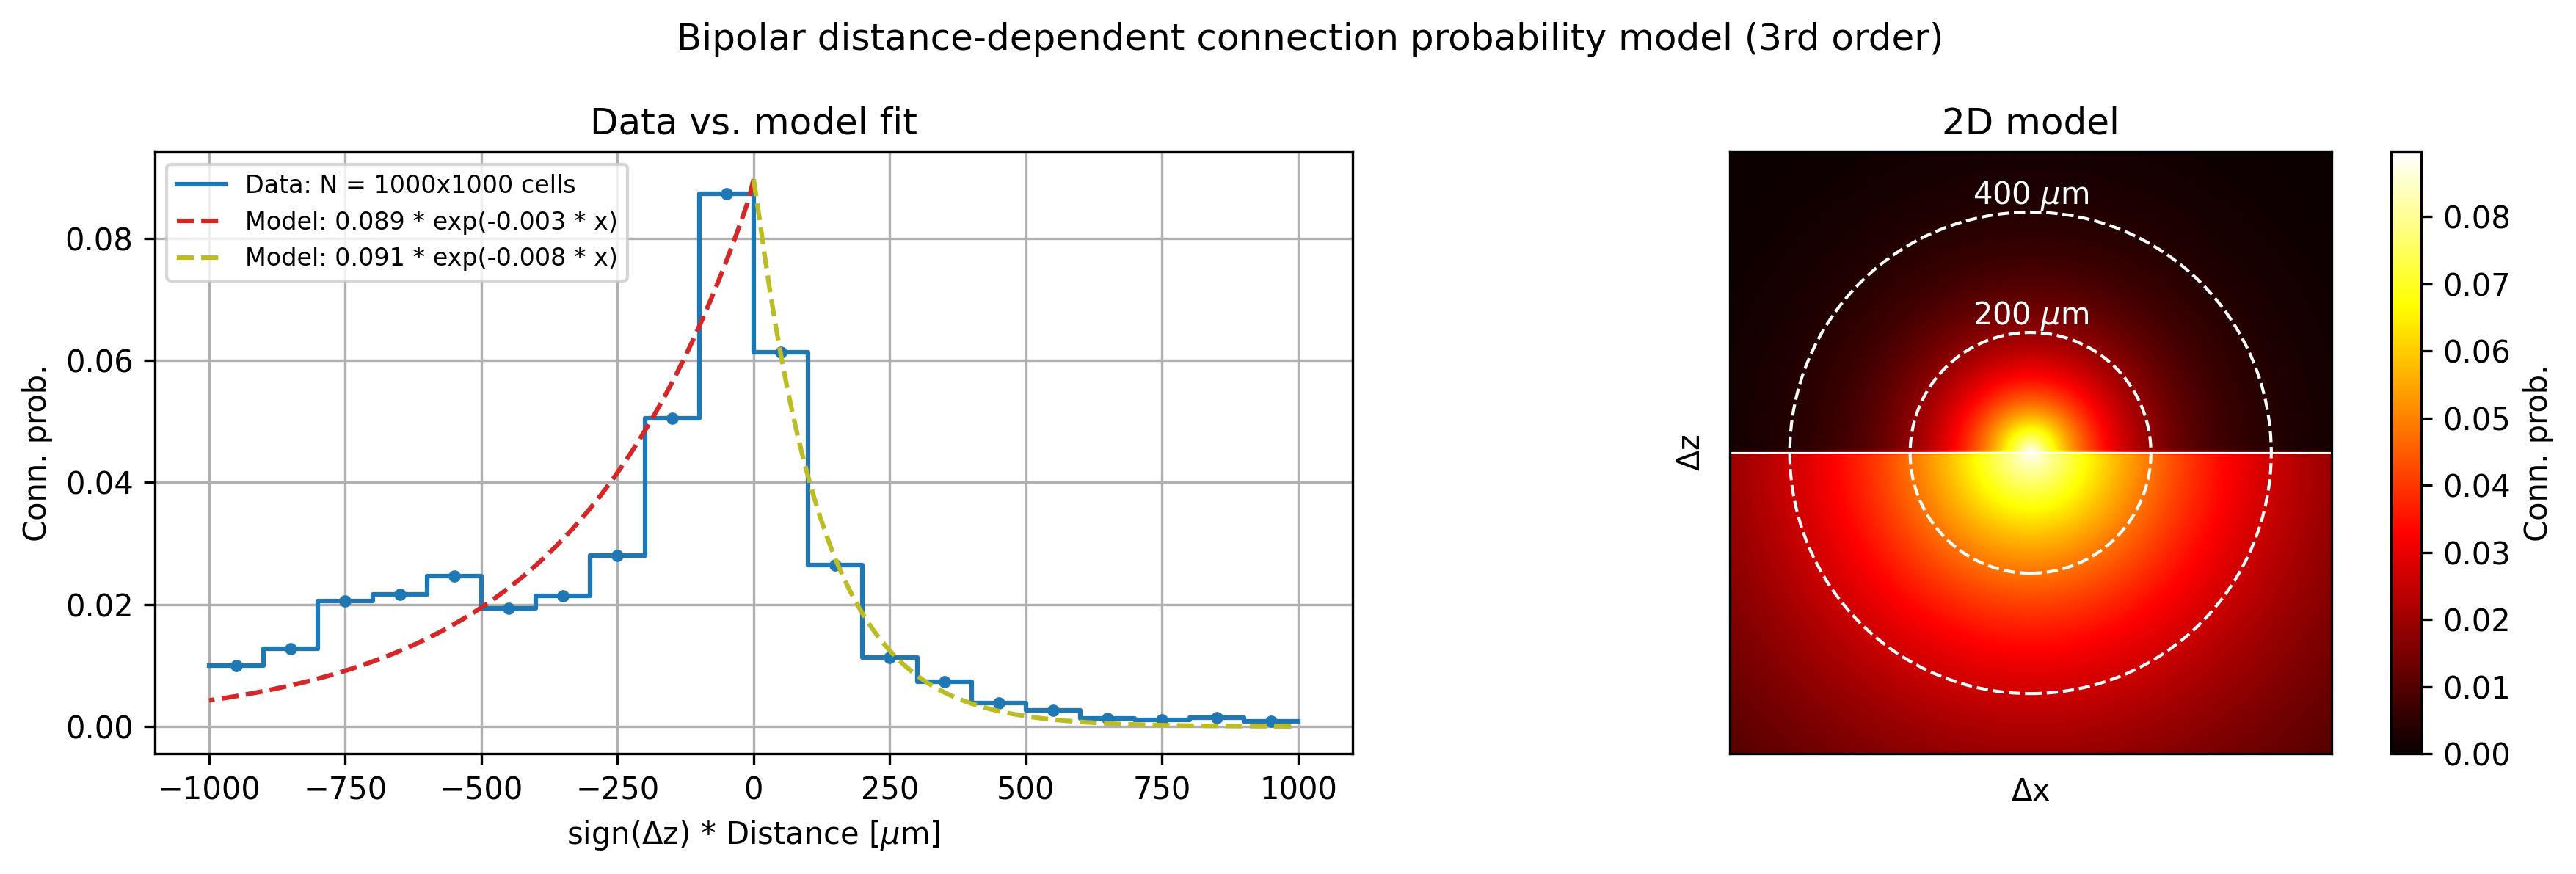

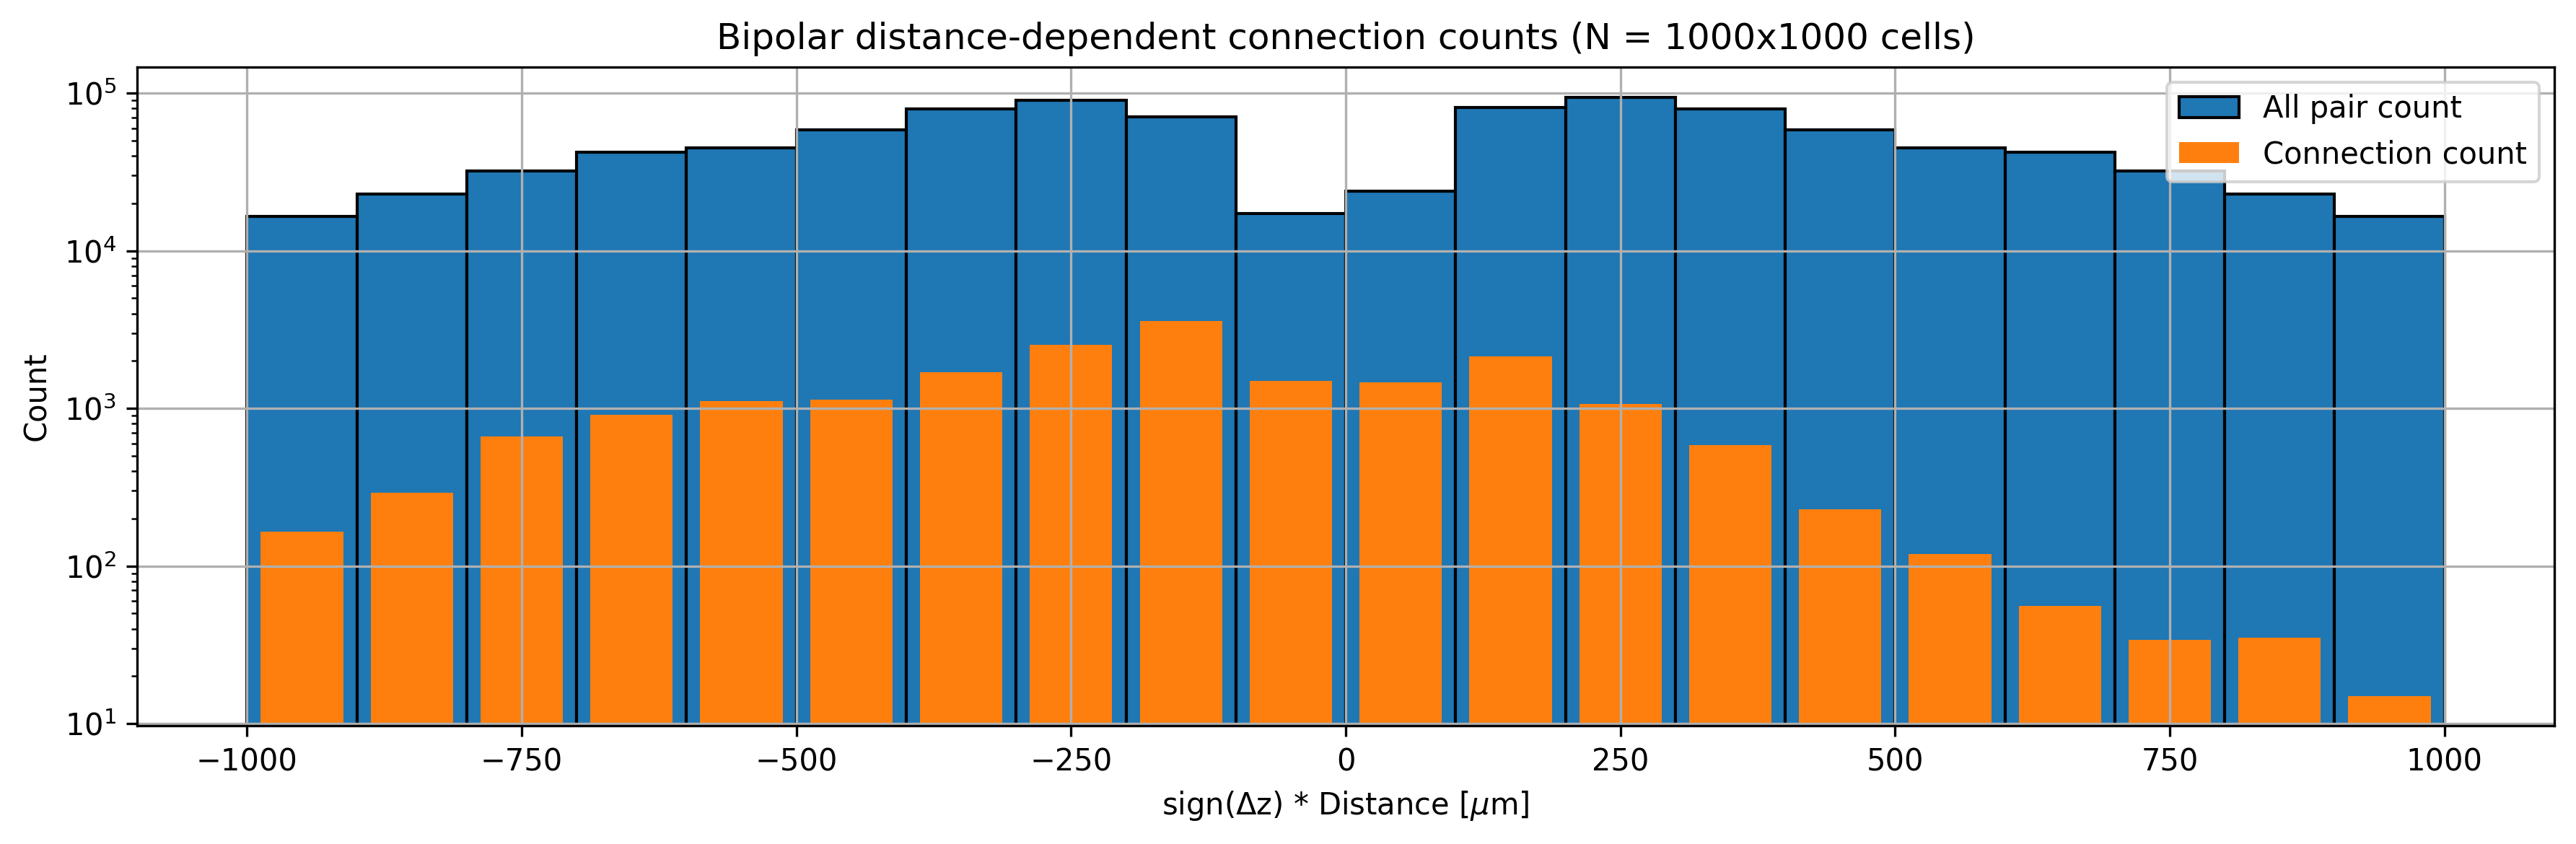

In [6]:
# Run model building
data_dict, model_dict = modelling.run_model_building(adj_matrix, nrn_table, **config_dict)

## How to access existing model

In [7]:
# Global imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle

# Local imports
from connalysis.modelling import modelling

In [8]:
# Load neuron file
nrn_file = './nodes_r0c10.h5'
nrn_table = pd.read_hdf(nrn_file)

### Example how to access and use 2nd-order model

In [9]:
# Specify model file
model_file = './modelling/models/ConnProb2ndOrder__model.pickle'

In [10]:
# Load model
with open(model_file, 'rb') as f:
    model_dict = pickle.load(f)
p_model = modelling.get_model_function(**model_dict) # Probability function
print(f'INFO: Loaded model function with {len(model_dict["model_inputs"])} input(s) {model_dict["model_inputs"]}')

INFO: Loaded model function with 1 input(s) ['d']


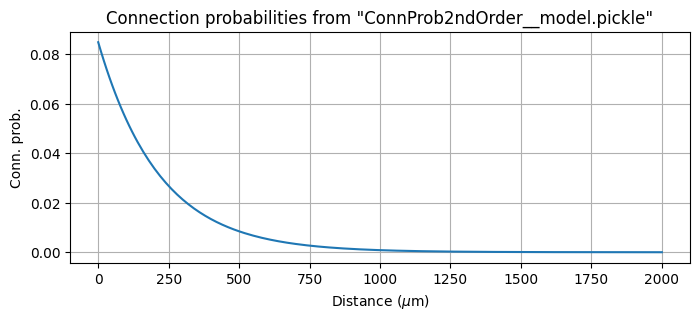

In [11]:
# Acces probabilities from model
d = np.arange(0, 2001, 10) # Distance in um
plt.figure(figsize=(8, 3))
plt.plot(d, p_model(d))
plt.grid()
plt.xlabel('Distance ($\mu$m)')
plt.ylabel('Conn. prob.')
plt.title(f'Connection probabilities from "{os.path.split(model_file)[-1]}"')
plt.show()

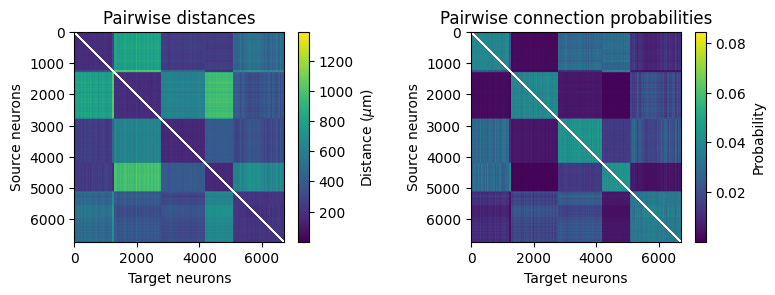

In [12]:
# Apply model using actual neuron positions
nrn_pos = nrn_table[['x', 'y', 'z']].to_numpy()
dist_mat = modelling.compute_dist_matrix(nrn_pos, nrn_pos) # Compute pairwise distances
p_mat = p_model(dist_mat) # ...and turn them into pairwise connection probabilities from model

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.imshow(dist_mat)
plt.title('Pairwise distances')
plt.xlabel('Target neurons')
plt.ylabel('Source neurons')
plt.colorbar(label='Distance ($\mu$m)')
plt.subplot(1, 2, 2)
plt.imshow(p_mat)
plt.title('Pairwise connection probabilities')
plt.xlabel('Target neurons')
plt.ylabel('Source neurons')
plt.colorbar(label='Probability')
plt.tight_layout()
plt.show()

### Example how to access and use 3rd-order model

In [13]:
# Specify model file
model_file = './modelling/models/ConnProb3rdOrder__model.pickle'

In [14]:
# Load model
with open(model_file, 'rb') as f:
    model_dict = pickle.load(f)
p_model = modelling.get_model_function(**model_dict) # Probability function
print(f'INFO: Loaded model function with {len(model_dict["model_inputs"])} input(s) {model_dict["model_inputs"]}')

INFO: Loaded model function with 2 input(s) ['d', 'dz']


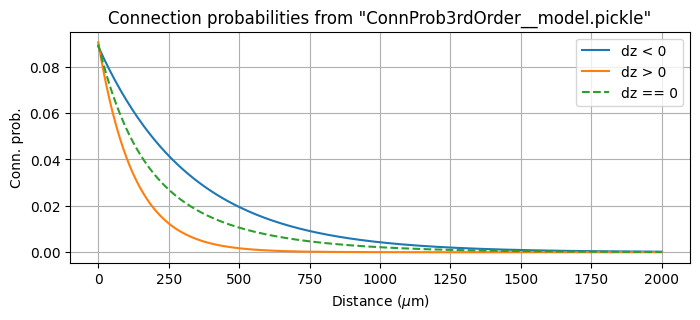

In [15]:
# Acces probabilities from model
d = np.arange(0, 2001, 10) # Distance in um
plt.figure(figsize=(8, 3))
plt.plot(d, p_model(d, -1), label=f'dz < 0')
plt.plot(d, p_model(d, 1), label=f'dz > 0')
plt.plot(d, p_model(d, 0), '--', label=f'dz == 0')
plt.grid()
plt.xlabel('Distance ($\mu$m)')
plt.ylabel('Conn. prob.')
plt.title(f'Connection probabilities from "{os.path.split(model_file)[-1]}"')
plt.legend()
plt.show()

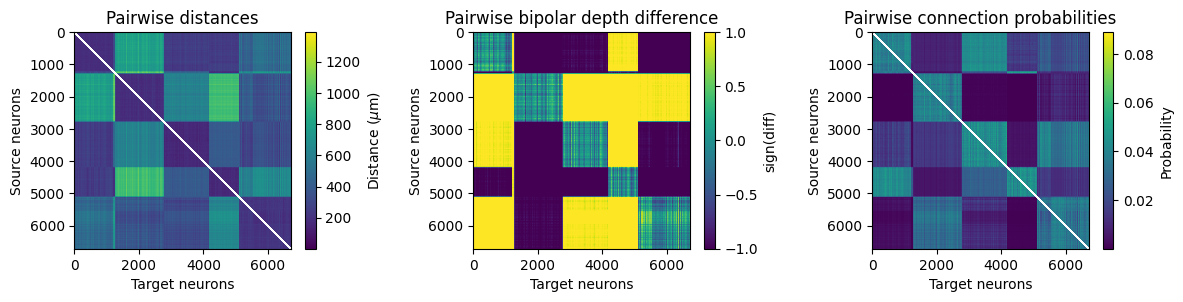

In [16]:
# Apply model using actual neuron positions
nrn_pos = nrn_table[['x', 'y', 'z']].to_numpy()
nrn_depths = nrn_table['depth'].to_numpy()
dist_mat = modelling.compute_dist_matrix(nrn_pos, nrn_pos) # Compute pairwise distances
bip_mat = modelling.compute_bip_matrix(nrn_depths, nrn_depths) # Compute pairwise (bipolar) depth differences: np.sign(PreDepth - PostDepth)
p_mat = p_model(dist_mat, bip_mat) # ...and turn them into pairwise connection probabilities from model

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.imshow(dist_mat)
plt.title('Pairwise distances')
plt.xlabel('Target neurons')
plt.ylabel('Source neurons')
plt.colorbar(label='Distance ($\mu$m)')
plt.subplot(1, 3, 2)
plt.imshow(bip_mat)
plt.title('Pairwise bipolar depth difference')
plt.xlabel('Target neurons')
plt.ylabel('Source neurons')
plt.colorbar(label='sign(diff)')
plt.subplot(1, 3, 3)
plt.imshow(p_mat)
plt.title('Pairwise connection probabilities')
plt.xlabel('Target neurons')
plt.ylabel('Source neurons')
plt.colorbar(label='Probability')
plt.tight_layout()
plt.show()

## How to run model building within pipeline
- Batch processing w/o producing any output files or figures
- Returns dataframe with model parameters
- _Optionally:_ Separate models for multiple random subsets of neurons

In [17]:
# Global imports
import numpy as np
import pandas as pd
import scipy.sparse as sps

import logging

# Local imports
from connalysis.modelling import modelling

In [18]:
# Load example data (adjacency matrix & neuron properties table)
adj_file = './adj_r0c10.npz'
nrn_file = './nodes_r0c10.h5'
adj_matrix = sps.load_npz(adj_file)
nrn_table = pd.read_hdf(nrn_file)
assert adj_matrix.shape[0] == adj_matrix.shape[1] == nrn_table.shape[0], 'ERROR: Data size mismatch!'
print(f'INFO: Loaded connectivity and properties of {nrn_table.shape[0]} neurons')

INFO: Loaded connectivity and properties of 6719 neurons


### Example how to build 2nd- and 3rd-order models

In [19]:
# Configure model building
config_dict = {'bin_size_um': 100,   # Bin size (um) for depth binning
               'max_range_um': 1000, # Max. distance (um) range to consider (None to use full distance range)
               'sample_size': 1000,  # Seed for selecting random subset of neurons
               'sample_seeds': 5}    # Number of seeds to randomly generate, or list of random seeds
# OPTIONAL:    'meta_seed': 0        # Meta seed for generating sample random seeds (default: 0)

logging.getLogger().setLevel(logging.WARNING) # Global control of logging level (default: INFO; WARNING to disable outputs)

In [20]:
model_params_2 = modelling.conn_prob_2nd_order_model(adj_matrix, nrn_table, **config_dict)
print(model_params_2)

100% |#################################################################################################################################################|
100% |#################################################################################################################################################|
100% |#################################################################################################################################################|
100% |#################################################################################################################################################|
100% |#################################################################################################################################################|


        exp_model_scale  exp_model_exponent
seed                                       
272519         0.079078            0.004708
392046         0.087843            0.005107
481608         0.084750            0.004821
872215         0.085368            0.004925
914437         0.083999            0.004844


In [21]:
model_params_3 = modelling.conn_prob_3rd_order_model(adj_matrix, nrn_table, **config_dict)
print(model_params_3)

100% |#################################################################################################################################################|
100% |#################################################################################################################################################|
100% |#################################################################################################################################################|
100% |#################################################################################################################################################|
100% |#################################################################################################################################################|


        bip_neg_exp_model_scale  bip_neg_exp_model_exponent  \
seed                                                          
272519                 0.074861                    0.002769   
392046                 0.090495                    0.003377   
481608                 0.087507                    0.003071   
872215                 0.089114                    0.003236   
914437                 0.081587                    0.003005   

        bip_pos_exp_model_scale  bip_pos_exp_model_exponent  
seed                                                         
272519                 0.092060                    0.008402  
392046                 0.092656                    0.008216  
481608                 0.093036                    0.008601  
872215                 0.088983                    0.008100  
914437                 0.094426                    0.008201  


## How to run model building from `sbatch` script

__1. Without data splits__
>`sbatch run_batch_modelling.sh`

__2. With N=5 data splits__
>Run parts 1..5:<br>
>`sbatch run_batch_modelling.sh 5 1`<br>
>`                              ...`<br>
>`sbatch run_batch_modelling.sh 5 5`<br><br>
>Merge results:<br>
>`sbatch run_batch_modelling.sh 5 -1`
